In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
%matplotlib inline
df = pd.read_csv('Energy_Dataset.csv')
df.Timestamp = pd.to_datetime(df.Timestamp)
rel_df = df.drop(labels=['Postcode','Customer', 'Price_AUD/MWh', 'Total_Demand_MWh', 'Latitude','Longitude' ], axis = 1)
total_df = rel_df.pivot_table(index='Timestamp',aggfunc='sum')


In [2]:
rate='d'

sol_std = total_df.Solar_Production_kWh.resample(rate).std()
cons_std = total_df.Energy_Consumption_kWh.resample(rate).std()
heat_std = total_df.Heating_Consumption_kWh.resample(rate).std()

sol_mean = total_df.Solar_Production_kWh.resample(rate).mean()
cons_mean = total_df.Energy_Consumption_kWh.resample(rate).mean()
heat_mean = total_df.Heating_Consumption_kWh.resample(rate).mean()

sol_CV = sol_std/sol_mean
cons_CV = cons_std/cons_mean
heat_CV = heat_std/heat_mean

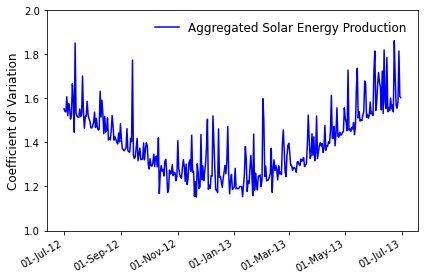

In [3]:
plt.plot(sol_CV, label='Aggregated Solar Energy Production',c='b')
plt.ylabel('Coefficient of Variation', fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%b-%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().set_ylim(1,2)

plt.legend(loc=1, fontsize =12, frameon=False)


plt.tight_layout()
plt.show()

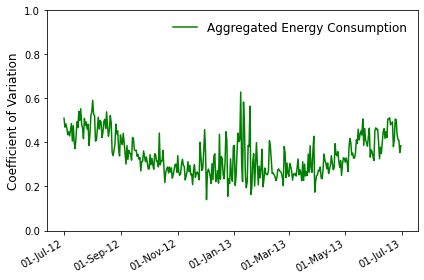

In [4]:
plt.plot(cons_CV, label='Aggregated Energy Consumption',c='g')
plt.ylabel('Coefficient of Variation', fontsize=12)
plt.gcf().autofmt_xdate()

plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().set_ylim(0,1)

plt.legend(loc=1, fontsize =12, frameon=False)


plt.tight_layout()
plt.show()

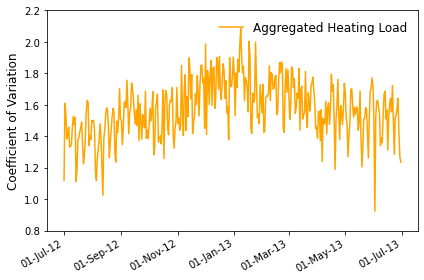

In [5]:
plt.plot(heat_CV, label='Aggregated Heating Load',c='orange')
plt.ylabel('Coefficient of Variation', fontsize=12)
plt.gcf().autofmt_xdate()

plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().set_ylim(0.8,2.2)

plt.legend(loc=1, fontsize =12, frameon=False)


plt.tight_layout()
plt.show()